# Linear Regression

# Testing the normal equation
## Synthesising a dataset and subsequently determing the parameters that fit the data.

In [1]:
import numpy as np

In [2]:
x = np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

In [3]:
import seaborn as sns

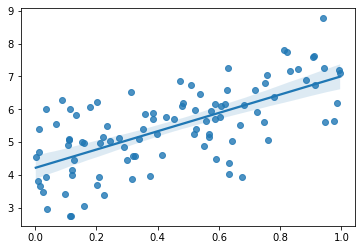

In [4]:
sns.regplot(x=x, y=y);

### Computing paramters using normal equation.

In [5]:
x_b = np.c_[np.ones((100,1)), x] # to add x0 as 1 for each instance

In [6]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [7]:
theta_best

array([[4.20988146],
       [2.79559098]])

### Computes the parameter values slightly off due to presence of noise (as opposed to 4 and 3 exact)

## Making predictions using these parameter values.

In [8]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

In [9]:
y_predict = x_new_b.dot(theta_best)

In [10]:
y_predict

array([[4.20988146],
       [9.80106343]])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

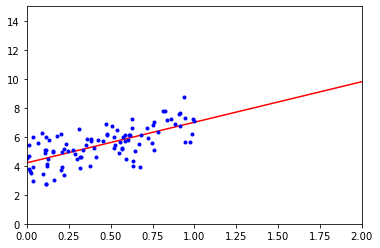

In [12]:
plt.plot(x_new, y_predict, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## Computing parameters using sk-learns's LinearRegression module

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.20988146]), array([[2.79559098]]))

In [16]:
lin_reg.predict(x_new)

array([[4.20988146],
       [9.80106343]])

## Implementing Gradient Descent Algorithm

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.20988189],
       [2.7955901 ]])

## Implementing Schoatic Gradient Descent

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[4.20481872],
       [2.79742759]])

### Using SGD for linear regression using sk-learn

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25742589]), array([2.61999665]))

## Polynomial Regression
### implementation

In [24]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

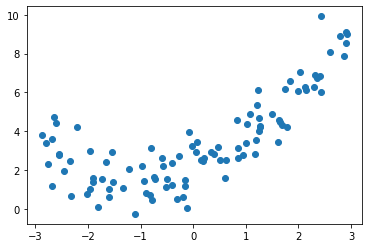

In [27]:
plt.scatter(X, y)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [30]:
X[0]

array([0.5006132])

In [31]:
X_poly[0]

array([0.5006132 , 0.25061358])

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([2.08202209]), array([[1.00612872, 0.47760125]]))

In [35]:
y_pred = lin_reg.predict(X_poly)

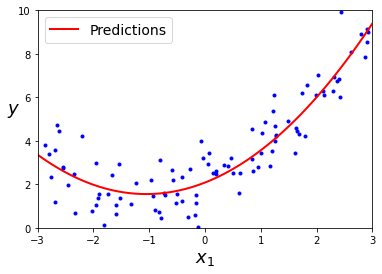

In [36]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## comparing linear model, quadratic model and a 300 degree model

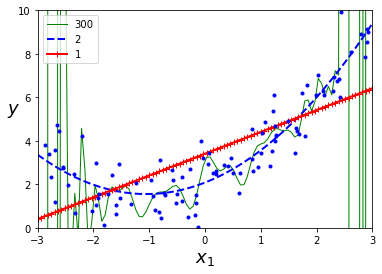

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Underfitting by the linear model and overfitting my the 300 degree model is clearnly observed

## Learning Curves

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)              

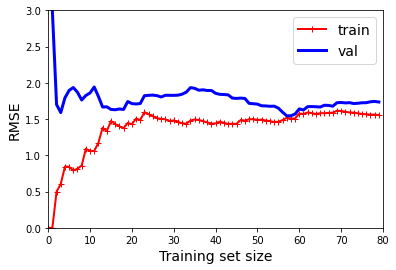

In [39]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()                                     

### Training set:
#### when there are just one or two instances in the training set, the model can fit them perfectly, 
#### which is why the curve starts at zero. But as
#### new instances are added to the training set, it becomes impossible for the model to fit
#### the training data perfectly, both because the data is noisy and because it is not linear
#### at all. So the error on the training data goes up until it reaches a plateau, at which
#### point adding new instances to the training set doesn’t make the average error much
#### better or worse.

### Validation set
#### When the model is trained on very few training instances, it is incapable of generalizing
#### properly, which is why the validation error is initially quite big. Then, as the
#### model is shown more training examples, it learns, and thus the validation error
#### slowly goes down. However, once again a straight line cannot do a good job modeling
#### the data, so the error ends up at a plateau, very close to the other curve.

### These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

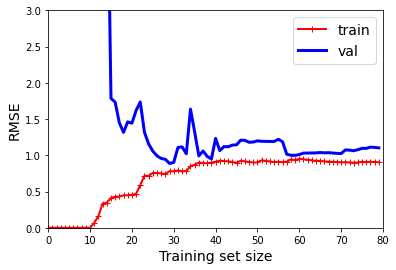

In [40]:
## Learning curve for a 10th degree polynomial model.
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
plt.show()                        

### Shows overfitting when the training instances are low. As the training instances increases, the model performance wrt overfitting improves.

## Regularisation

## Ridge Regression
### Implementation in sk-learn

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [42]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [43]:
ridge_reg.predict([[1.5]])

array([[4.90873824]])

### using SGD

In [44]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")

In [45]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [46]:
sgd_reg.predict([[1.5]])

array([4.90273322])

## Lasso Regression

### Implementing using sk-learn.

In [47]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)

In [48]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [49]:
lasso_reg.predict([[1.5]])

array([4.86137658])

### implementation using SGD

In [50]:
sgd_lasso = SGDRegressor(penalty="l1")
sgd_lasso.fit(X, y.ravel())
sgd_lasso.predict([[1.5]])

array([4.8941544])

## Elastic Net

### implementation using sk-learn

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86226278])